In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from scipy import signal
from scipy.signal import find_peaks
import pandas as pd

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


# =========================================================================================
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


# =========================================================================================
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band', analog=False)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


# =========================================================================================
def gain_freq(temp_df):
    sampling_rate = 1000
    # based on resistance
    temp_df['Resistance'] = temp_df['Volts'] / temp_df['Amps']
    time_slot = len(temp_df['Resistance'])/ sampling_rate
    plt.plot(temp_df['Resistance'])
    plt.show()

    filtered_wave_pulse1 = butter_lowpass_filter(temp_df['Resistance'].values,1.5,sampling_rate,5)
    filtered_wave_pulse2 = butter_highpass_filter(filtered_wave_pulse1,1.5,sampling_rate,2)
    peak_index_pulse,_ = find_peaks(filtered_wave_pulse2,distance=330)
    freq_p = len(peak_index_pulse)/time_slot
    
    plt.plot(filtered_wave_pulse2)
    plt.scatter(peak_index_pulse, filtered_wave_pulse2[peak_index_pulse], c='red')
    #plt.ylim(-0.002,0.002)
    #plt.xlim(10000,20000)
    plt.show()
    
    #=========================================================================================
    filtered_wave_breath1 = butter_lowpass_filter(temp_df['Resistance'].values,1,sampling_rate,5)
    filtered_wave_breath2 = butter_highpass_filter(filtered_wave_breath1,0.1,sampling_rate,2)
    peak_index_breath,_ = find_peaks(filtered_wave_breath2,distance=2000)
    freq_b = len(peak_index_breath)/time_slot
    
    plt.plot(filtered_wave_breath2)
    plt.scatter(peak_index_breath, filtered_wave_breath2[peak_index_breath], c='red')
    #plt.ylim(-0.05,0.2)
    #plt.xlim(20000,40000)
    plt.show()
    
    print('breath:{:3d}, pulse:{:3d}'.format(len(peak_index_breath), len(peak_index_pulse)))
    print('breath:{:.4f}, pulse:{:.4f}'.format(freq_b, freq_p))
    
    return freq_b, freq_p

In [30]:
H = pd.read_csv('D://Xin Zhang/Sensor/conbination/NewData/for_livedemo/H.txt', sep="\t")
G = pd.read_csv('D://Xin Zhang/Sensor/conbination/NewData/for_livedemo/G.txt', sep="\t")

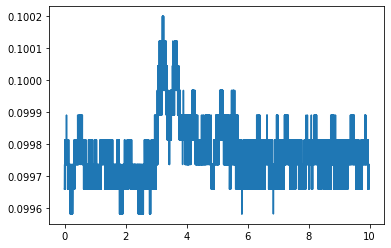

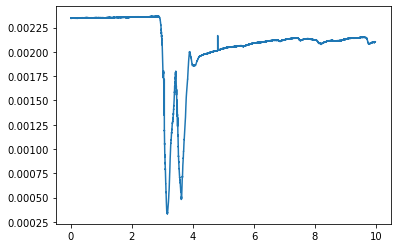

In [31]:
plt.plot(H['Time'], H['Volts'])
plt.show()
plt.plot(H['Time'], H['Amps'])
plt.show()

<ipython-input-37-e1bb38c5edd9>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Resistance'] = temp_df['Volts'] / temp_df['Amps']


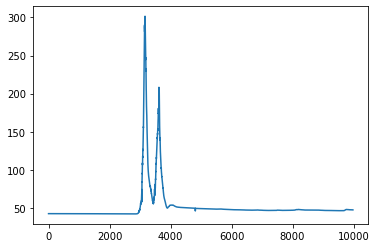

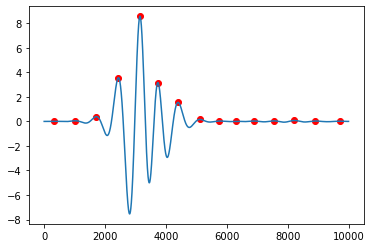

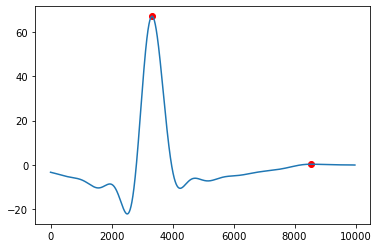

breath:  2, pulse: 15
breath:0.2005, pulse:1.5035
0.20046106043900971 1.503457953292573


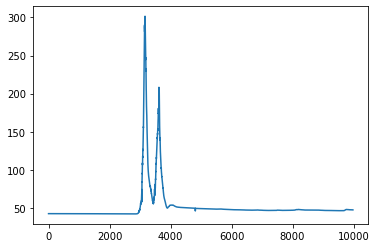

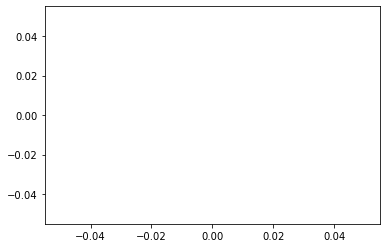

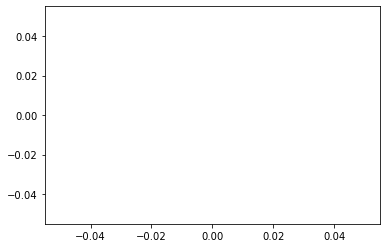

breath:  0, pulse:  0
breath:0.0000, pulse:0.0000
0.0 0.0


In [48]:
temp_df = pd.read_csv('D://Xin Zhang/Sensor/conbination/NewData/for_livedemo/H.txt',sep = "\t")
freq_p, freq_b = gain_freq(temp_df.loc[0:9976])
print(freq_p, freq_b)
freq_p, freq_b = gain_freq(temp_df)
print(freq_p, freq_b)

In [46]:
temp_df == np.nan

,Time,Volts,Amps,Resistance
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
9973,False,False,False,False
9974,False,False,False,False
9975,False,False,False,False
9976,False,False,False,False


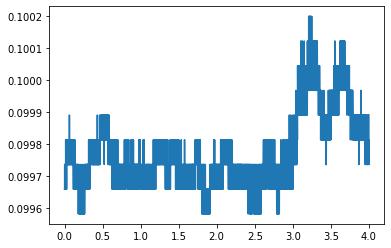

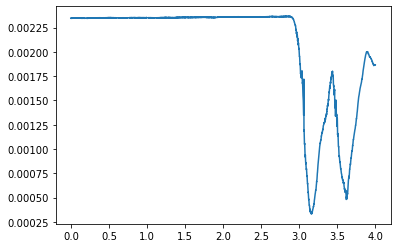

In [11]:
plt.plot(G['Time'], G['Volts'])
plt.show()
plt.plot(G['Time'], G['Amps'])
plt.show()